# IDAI 610 PS 1: Problem 3

# Wisconsin Diagnostic Breast Cancer (WDBC) Data

W. Nick Street, W. H. Wolberg, and O. L. Mangasarian "Nuclear feature extraction for breast tumor diagnosis", Proc. SPIE 1905, Biomedical Image Processing and Biomedical Visualization, (29 July 1993); https://doi.org/10.1117/12.148698.

## Problem Description
### Task
Classify tumor nuclei to two classes: Malignant (M) and Benign (B).

### Dataset 
Wisconsin Diagnostic Breast Cancer (WDBC) data. 

Source: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

## Import libraries

In [17]:
import graphviz
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

In [18]:
np.random.seed(seed=42)

## Read dataset partitions

In [19]:
# First run with wdbc_*_normalized.csv and also compare the result with wdbc_*_raw.csv data
# Loading training, tuning, and test data
df_train = pd.read_csv("./wdbc/wdbc_train_normalized.csv")
df_dev = pd.read_csv("./wdbc/wdbc_dev_normalized.csv")
df_test = pd.read_csv("./wdbc/wdbc_test_normalized.csv")

In [20]:
df_train

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,...,worstTexture,worstPerimeter,worstArea,worstSmoothness,worstCompactness,worstConcavity,worstConcavePoints,worstSymmetry,worstFractalDimension,Diagnosis
0,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,M
1,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,M
2,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,M
3,1.169878,0.160508,1.137124,1.094332,-0.123028,0.088218,0.299809,0.646366,-0.064268,-0.761662,...,0.322599,1.367122,1.274098,0.518184,0.021196,0.509104,1.195664,0.262245,-0.014718,M
4,-0.319885,0.588312,-0.183919,-0.383870,2.199903,1.682529,1.218025,1.149680,1.963872,1.571079,...,0.822090,-0.031581,-0.248145,1.661295,1.816711,1.278909,1.390393,2.387756,1.287517,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,-0.830662,2.343703,-0.876540,-0.764076,-1.555040,-1.301977,-1.113893,-1.260710,-2.741705,-1.101588,...,2.053734,-0.954428,-0.774528,-1.738693,-1.266871,-1.304683,-1.743529,-2.157444,-1.378409,B
337,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467,M
338,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122,M
339,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129,M


In [21]:
df_train.columns[:-1].tolist()

['Radius',
 'Texture',
 'Perimeter',
 'Area',
 'Smoothness',
 'Compactness',
 'Concavity',
 'ConcavePoints',
 'Symmetry',
 'FractalDimension',
 'seRadius',
 'seTexture',
 'sePerimeter',
 'seArea',
 'seSmoothness',
 'seCompactness',
 'seConcavity',
 'seConcavePoints',
 'seSymmetry',
 'seFractalDimension',
 'worstRadius',
 'worstTexture',
 'worstPerimeter',
 'worstArea',
 'worstSmoothness',
 'worstCompactness',
 'worstConcavity',
 'worstConcavePoints',
 'worstSymmetry',
 'worstFractalDimension']

## Fromat the train, tune, and test data

In [22]:
features = df_train.columns[:-1].tolist()

# Concatenation for PredefinedSplit below
x_train = np.concatenate([df_train[features], df_dev[features]])
y_train = np.concatenate([df_train["Diagnosis"], df_dev["Diagnosis"]])

x_test = df_test[features].to_numpy()
y_test = df_test["Diagnosis"].to_numpy()

## Tuning hyperparameters
You are tuning two hyperparameters: the splitting criterion (two options) and max depths (3 to 50, consecutively, so 48 options).

In [10]:
tree_params = {'criterion':['gini','entropy'],'max_depth':list(np.arange(3,51))}

# The function PredefinedSplit ensures that the same dev set is used for development testing in the tuning phase
test_fold = [-1 for _ in range(df_train.shape[0])] + [0 for _ in range(df_dev.shape[0])]
ps = PredefinedSplit(test_fold)

clf = GridSearchCV(tree.DecisionTreeClassifier(), tree_params, cv=ps)
clf.fit(x_train, y_train)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [np.int64(3), np.int64(4), np.int64(5),
                                       np.int64(6), np.int64(7), np.int64(8),
                                       np.int64(9), np.int64(10), np.int64(11),
                                       np.int64(12), np.int64(13), np.int64(14),
                                       np.int64(15), np.int64(16), np.int64(17),
                                       np.int64(18), np.int64(19), np.int64(20),
                                       np.int64(21), np.int64(22), np.int64(23),
                                       np.int64(24), np.int64(25), np.int64(26),
                                       np.int64(27), np.int64(28), np.int64(29),
                                       np.int64(30), np.int64(31), np.int64(32), ...]})

## Display the best hyperparameters

In [23]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': np.int64(24)}

In [24]:
clf.best_params_["criterion"]

'entropy'

## Load the best decision tree model/hypothesis

In [37]:
# Use the best hyperparameters from the grid search to create the decision tree, using the training set
best_tree_model = tree.DecisionTreeClassifier(criterion=clf.best_params_['criterion'], max_depth=clf.best_params_['max_depth'])
best_tree_model.fit(df_train[features].to_numpy(), df_train["Diagnosis"].to_numpy())

ValueError: could not convert string to float: 'l4'

## Use the trained decision tree for inference on the held out test-set and output performance metrics

In [26]:
y_pred = best_tree_model.predict(x_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.96      0.97      0.97        72
           M       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [38]:
df_train = pd.read_csv("./wdbc/wdbc_train.csv")
df_dev = pd.read_csv("./wdbc/wdbc_dev.csv")
df_test = pd.read_csv("./wdbc/wdbc_test.csv")

target_feature = 'Diagnosis'
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
X_train, y_train = df_train.iloc[:, :-1], df_train[target_feature]
X_test, y_test = df_test.iloc[:, :-1], df_test[target_feature]

ord_enc = OrdinalEncoder()
X_train = ord_enc.fit_transform(X_train)
X_test = ord_enc.transform(X_test)

label_enc = LabelEncoder()
y_train = label_enc.fit_transform(y_train)
y_test = label_enc.transform(y_test)

In [39]:
best_tree_model = tree.DecisionTreeClassifier(criterion=clf.best_params_['criterion'], max_depth=clf.best_params_['max_depth'])
best_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=np.int64(24))

In [43]:
y_pred = best_tree_model.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## Visualization

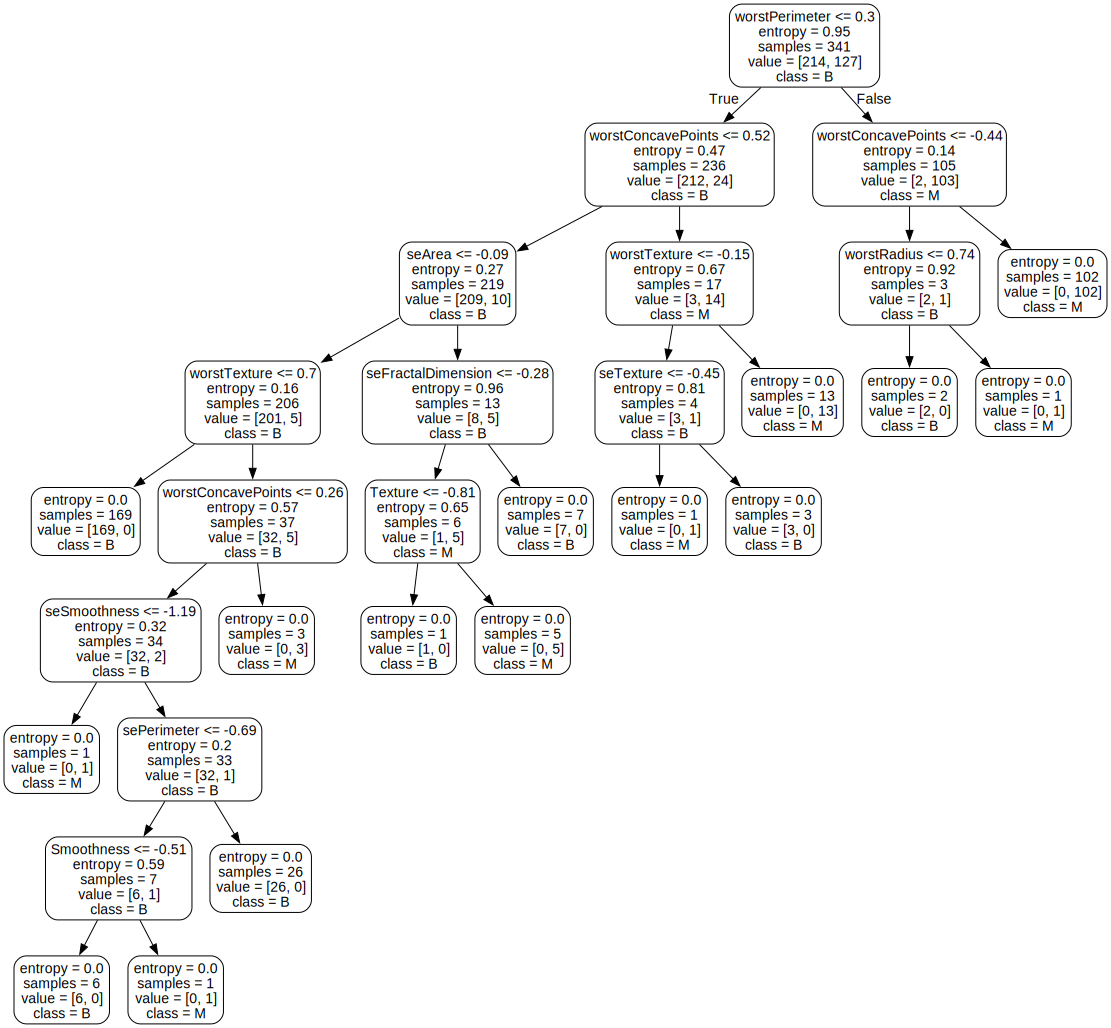

In [15]:
#Use graphviz to print the tree with nice formatting
dot_data = tree.export_graphviz(best_tree_model, out_file=None, feature_names=features, rounded=True,class_names=["B","M"],precision=2) 
graph = graphviz.Source(dot_data)
graph

## Determine the features' importance and display them in sorted format

In [16]:
feature_importances = best_tree_model.feature_importances_
importance_dict = {feature: importance for feature, importance in zip(features, feature_importances)}
df_feature_imp = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Gini Importance'])

df_feature_imp.sort_values('Gini Importance', ascending=False)

,Feature,Gini Importance
22,worstPerimeter,0.611368
27,worstConcavePoints,0.195786
21,worstTexture,0.064628
13,seArea,0.037489
19,seFractalDimension,0.026465
14,seSmoothness,0.013881
4,Smoothness,0.012751
1,Texture,0.012007
11,seTexture,0.009991
20,worstRadius,0.008482
